# Name: Hrishikesh Mukund 
# Exam: Linear and Logistic Regression - 1

### 1) Using the following information, identify the plot whether it is a typical Logistic Model plot  or  Linear Regression Model plot.


The Graph given is a logistic Model plot. When you perform log transform to the data, the  data points lie between 0 and 1 and it is known as a sigmoidal graph. The predicted values lie between 0 and 1 as well, it gives the probability of 1 occuring

### 2) For Logistic regression what are the possible valid values the response or target variable can take

For logistic regression, the possible values are 0 and 1 for the target variable. The model spits out the probability and as per the user's requirement, the user can set a cap for 0 and 1 probability

### 3)

In [162]:
# imports
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api
from statsmodels.api import graphics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# Generate 35 values, with mean of 25 & s.d. = 5 and sort on bmi
import random
import pandas as pd
mu       = 25
sigma   = 5
BMI      = []
random.seed(123456)
for i in range(35):
    bmi = int(random.normalvariate(mu, sigma))
    BMI.append(bmi)
##
BMI.sort()
mortality  = [0,0,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1]
df         = pd.DataFrame({'BMI' : BMI, 'mortality' : mortality})
print(df)


    BMI  mortality
0    14          0
1    17          0
2    17          0
3    18          0
4    18          0
5    19          0
6    19          1
7    20          0
8    20          1
9    20          0
10   21          1
11   21          1
12   22          0
13   22          1
14   23          1
15   23          1
16   23          0
17   24          1
18   24          1
19   24          1
20   24          1
21   25          1
22   25          1
23   25          0
24   26          1
25   26          1
26   27          1
27   27          1
28   28          0
29   28          1
30   29          0
31   31          1
32   31          1
33   32          1
34   33          1


### i) Select and name the suitable model (either Linear or Logistic) for predicting the target variable, Chance or probability  of Admit

The model to be used is Logistic regression to predict the mortality rate

### ii)	State why the model you have not selected is not suitable

Linear regression model is used to predict continuous variables and since the mortality rate is a categorical variable with values 0s and 1s, we cannot use linear model

### iii) State the assumptions of the model

The assumptions are:
 
 a) There is a linear relationship between the independent variables and the log odds of the outcome
 
 b) The target or the dependent vaiable must be a categorical binary and ordinal
 
 c) There are no outliers or extreme values
 
 d) There is either very little or no multicollinearity between the independent variables
 
 e) The sample size should be large
 
 f) The observations should be independent of each other

### iv)	Build the model using the data set, df

In [165]:
#Using GLM method

In [166]:
log_glm = sm.glm(formula = "mortality ~ BMI" , data = df,
                    family=statsmodels.api.families.Binomial()).fit()

In [167]:
#Using scikit learn library

In [168]:
X = pd.DataFrame(df['BMI'])
Y = df['mortality']

In [169]:
# Take 5 samples as test data and train the model on 30 samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=5, random_state=1)

In [170]:
log_model = LogisticRegression()

In [171]:
log_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### v) Evaluate the model performance using the data set df with appropriate measure

In [172]:
Y_predict = log_model.predict(X_test)
Y_predict

array([1, 1, 1, 1, 1], dtype=int64)

In [173]:
Y_test

14    1
19    1
3     0
29    1
33    1
Name: mortality, dtype: int64

In [174]:
metrics.accuracy_score(Y_test,Y_predict)

0.8

In [175]:
metrics.confusion_matrix(Y_test,Y_predict)

array([[0, 1],
       [0, 4]], dtype=int64)

In [176]:
print(metrics.classification_report(Y_test,Y_predict))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.80      1.00      0.89         4

avg / total       0.64      0.80      0.71         5



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


a) The accuracy score of the built model is 80%

 b) True positive is 4 and False positive is 1
 
 c) Both True negative and False negative is 0
 
 d) Type - I error is 1 and Type - II error is 0
 
 e) Recall is 100% and precision is 80% for mortality rate 1

### vi) predict mortality for the BMI values 31, 35 and 24 using the model you had built

In [177]:
X_future = pd.DataFrame([31,35,24])

In [178]:
Y_future = log_model.predict(X_future)
Y_future

array([1, 1, 1], dtype=int64)

The predicted values for 31, 35 and 24 are 1,1,1 respectively

### vii) Interpret the p-values (Set 5% as level of significance)

In [179]:
log_glm.params

Intercept   -6.047008
BMI          0.286764
dtype: float64

In [180]:
log_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              mortality   No. Observations:                   35
Model:                            GLM   Df Residuals:                       33
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.499
Date:                Mon, 05 Nov 2018   Deviance:                       36.998
Time:                        12:19:55   Pearson chi2:                     37.4
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0470      2.580     -2.344      0.019     -11.103      -0.991
BMI            0.2868      0.114      2.522      0.012       0.064       0.510
==============================================================================
"""

The p-value of BMI is 0.012 and it is less than the significance level of 0.05 and hence we reject the null hypothesis that the variable is insignificant


### viii) If you have used Logistic Regression:  Interpret the odds ratio.

In [181]:
coef = log_model.coef_
coef

array([[0.05984979]])

In [182]:
#Odds ratio is exponent of coefficient
np.exp(coef)

array([[1.06167706]])

The odds ratio is 1.061, which means it has 6.1% increase in odds at any value of BMI

### 4) Admissions

In [183]:
admission_df = pd.read_csv("Admissions.csv")
admission_df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

Data cleaning and EDA

In [184]:
admission_df = admission_df.drop(['Serial No.'], axis = 1)
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [185]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [186]:
admission_df.describe().T

count        mean        std     min     25%     50%  \
GRE Score          400.0  316.807500  11.473646  290.00  308.00  317.00   
TOEFL Score        400.0  107.410000   6.069514   92.00  103.00  107.00   
University Rating  400.0    3.087500   1.143728    1.00    2.00    3.00   
SOP                400.0    3.400000   1.006869    1.00    2.50    3.50   
LOR                400.0    3.452500   0.898478    1.00    3.00    3.50   
CGPA               400.0    8.598925   0.596317    6.80    8.17    8.61   
Research           400.0    0.547500   0.498362    0.00    0.00    1.00   
Chance of Admit    400.0    0.724350   0.142609    0.34    0.64    0.73   

                        75%     max  
GRE Score          325.0000  340.00  
TOEFL Score        112.0000  120.00  
University Rating    4.0000    5.00  
SOP                  4.0000    5.00  
LOR                  4.0000    5.00  
CGPA                 9.0625    9.92  
Research             1.0000    1.00  
Chance of Admit      0.8300    0.97

In [187]:
sns.pairplot(admission_df)

### i) Select and name the suitable model (either Linear or Logistic) for predicting the target variable, Chance or probability  of Admit 

The model to be used is a Linear Regression model to predict the target variable chance or probability of Admit

### ii) State why the model you have not selected is not suitable

Logistic regression predicts the probability of occurance of a particular category in a categorical target variable. But here since we need to predict the probabilities, which is a continuous variable, we cannot use Logistic Regression

### iii) State the assumptions of the model

The assumptions are:

a) There is a linear relationship between the dependent and the independent variables

b) All the variables should be normally distributed

c) There should be very little or no multicollinearity

d) The error between the dependent variable and all the independent variables should be same, which is it should be homoscedastic in nature

e) There should be little or no autocorrelation

### iv)	Split the data into train data set and test data set in the ration 70:30

In [188]:
admission_df.head(1)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   

   Chance of Admit   
0              0.92

In [189]:
X = admission_df.drop(['Chance of Admit '], axis = 1)
Y = admission_df['Chance of Admit ']

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(280, 7)
(280,)
(120, 7)
(120,)


### v) Build the model using the train data

In [191]:
linear_model_ols = sm.OLS(Y_train,X_train).fit()


In [192]:
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4570.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          8.30e-279
Time:                        12:20:01   Log-Likelihood:                 354.89
No. Observations:                 280   AIC:                            -695.8
Df Residuals:                     273   BIC:                            -670.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0024      0.001     -4.743      0.000      -0.003      -0.001
TOEFL Score           0.0031      0.001      2.218      0.027       0.000       0.006
University Rating     0.0225      0.006      3.647      0.000       0.010       0.035
SOP                   0.0022      0.008      0.288      0.774      -0.013       0.017
LOR                   0.0186      0.007      2.645      0.009       0.005       0.033
CGPA                  0.1144      0.016      7.279      0.000       0.083       0.145
Research              0.0589      0.009      6.247      0.000       0.040       0.078
==============================================================================
Omnibus:                       50.433   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.369
Skew:                          -1.040   Prob(JB):                     3.53e-18
Kurtosis:                       4.599   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check the p-value for significance. 
The variable SOP has high p-value of 0.774 and hence we drop that variable to train the next model

In [193]:
linear_model_ols = sm.OLS(Y_train,X_train.drop(['SOP'], axis = 1)).fit()

In [194]:
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5350.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          1.13e-280
Time:                        12:20:01   Log-Likelihood:                 354.85
No. Observations:                 280   AIC:                            -697.7
Df Residuals:                     274   BIC:                            -675.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0024      0.000     -4.924      0.000      -0.003      -0.001
TOEFL Score           0.0032      0.001      2.296      0.022       0.000       0.006
University Rating     0.0232      0.006      4.047      0.000       0.012       0.034
LOR                   0.0194      0.007      2.985      0.003       0.007       0.032
CGPA                  0.1151      0.016      7.406      0.000       0.084       0.146
Research              0.0592      0.009      6.304      0.000       0.041       0.078
==============================================================================
Omnibus:                       50.196   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.887
Skew:                          -1.037   Prob(JB):                     4.50e-18
Kurtosis:                       4.597   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All the variables are below the significance level 5% that is 0.05 and hence now we should check the VIF for each variable for multicollinearity

In [195]:
# VIF Function
def myVIFfunc(aa):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    b=aa.as_matrix()
    vif=[variance_inflation_factor(b,i)
         for i in range(b.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['col']=aa.columns
    vif_factors['vif']=vif
    return vif_factors

In [196]:
myVIFfunc(X_train.drop(['SOP'], axis = 1))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


col          vif
0          GRE Score  1460.749531
1        TOEFL Score  1315.944578
2  University Rating    20.811072
3               LOR     31.849519
4               CGPA  1060.177878
5           Research     2.784909

GRE Score has highest VIF factor, so we can drop GRE Score and run the model

In [197]:
linear_model_ols = sm.OLS(Y_train,X_train.drop(['GRE Score','SOP'], axis = 1)).fit()

In [198]:
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5915.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          1.55e-277
Time:                        12:20:02   Log-Likelihood:                 342.98
No. Observations:                 280   AIC:                            -676.0
Df Residuals:                     275   BIC:                            -657.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
TOEFL Score          -0.0014      0.001     -1.365      0.173      -0.004       0.001
University Rating     0.0354      0.005      6.580      0.000       0.025       0.046
LOR                   0.0229      0.007      3.411      0.001       0.010       0.036
CGPA                  0.0770      0.014      5.486      0.000       0.049       0.105
Research              0.0638      0.010      6.560      0.000       0.045       0.083
==============================================================================
Omnibus:                       44.676   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.616
Skew:                          -0.959   Prob(JB):                     2.08e-15
Kurtosis:                       4.455   Cond. No.                         361.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check the p-value for significance. 
The variable TOEFL Score has high p-value of 0.173 and hence we drop that variable to train the next model

Drop CGPA

In [199]:
linear_model_ols = sm.OLS(Y_train,X_train.drop(['GRE Score','SOP','TOEFL Score'], axis = 1)).fit()

In [200]:
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7370.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          4.29e-279
Time:                        12:20:02   Log-Likelihood:                 342.03
No. Observations:                 280   AIC:                            -676.1
Df Residuals:                     276   BIC:                            -661.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
University Rating     0.0356      0.005      6.623      0.000       0.025       0.046
LOR                   0.0245      0.007      3.692      0.000       0.011       0.038
CGPA                  0.0581      0.002     25.322      0.000       0.054       0.063
Research              0.0654      0.010      6.770      0.000       0.046       0.084
==============================================================================
Omnibus:                       48.063   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.884
Skew:                          -0.999   Prob(JB):                     3.33e-17
Kurtosis:                       4.584   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables are below the significance level 5% that is 0.05 and hence now we should check the VIF for each variable for multicollinearity

In [201]:
myVIFfunc(X_train.drop(['TOEFL Score','GRE Score','SOP'], axis = 1))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


col        vif
0  University Rating  16.891693
1               LOR   30.543509
2               CGPA  21.244544
3           Research   2.714912

Drop LOR

In [202]:
linear_model_ols = sm.OLS(Y_train,X_train.drop(['GRE Score','SOP','TOEFL Score','LOR '], axis = 1)).fit()

In [203]:
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9393.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          3.16e-278
Time:                        12:20:02   Log-Likelihood:                 335.28
No. Observations:                 280   AIC:                            -664.6
Df Residuals:                     277   BIC:                            -653.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
University Rating     0.0459      0.005      9.766      0.000       0.037       0.055
CGPA                  0.0640      0.002     38.443      0.000       0.061       0.067
Research              0.0688      0.010      6.990      0.000       0.049       0.088
==============================================================================
Omnibus:                       52.961   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.019
Skew:                          -1.095   Prob(JB):                     5.69e-19
Kurtosis:                       4.550   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables are below the significance level 5% that is 0.05 and hence now we should check the VIF for each variable for multicollinearity

In [204]:
myVIFfunc(X_train.drop(['TOEFL Score','GRE Score','SOP','LOR '], axis = 1))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


col        vif
0  University Rating  12.348515
1               CGPA  10.718078
2           Research   2.691045

Drop University rating

In [205]:
linear_model_ols = sm.OLS(Y_train,X_train.drop(['GRE Score','SOP','TOEFL Score','LOR ','University Rating'], axis = 1)).fit()

In [206]:
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          1.71e-262
Time:                        12:20:02   Log-Likelihood:                 293.86
No. Observations:                 280   AIC:                            -583.7
Df Residuals:                     278   BIC:                            -576.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CGPA           0.0784      0.001     87.141      0.000       0.077       0.080
Research       0.1037      0.011      9.774      0.000       0.083       0.125
==============================================================================
Omnibus:                       28.407   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.936
Skew:                          -0.828   Prob(JB):                     4.27e-08
Kurtosis:                       3.407   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the variables are below the significance level 5% that is 0.05 and hence now we should check the VIF for each variable for multicollinearity


In [207]:
myVIFfunc(X_train.drop(['TOEFL Score','GRE Score','SOP','LOR ','University Rating'], axis = 1))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


col       vif
0      CGPA  2.335603
1  Research  2.335603

We can keep the two variables in the model as VIF is not greater than 5

In [208]:
#Final Model
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          1.71e-262
Time:                        12:20:02   Log-Likelihood:                 293.86
No. Observations:                 280   AIC:                            -583.7
Df Residuals:                     278   BIC:                            -576.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CGPA           0.0784      0.001     87.141      0.000       0.077       0.080
Research       0.1037      0.011      9.774      0.000       0.083       0.125
==============================================================================
Omnibus:                       28.407   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.936
Skew:                          -0.828   Prob(JB):                     4.27e-08
Kurtosis:                       3.407   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### vi)	Evaluate the model performance using the test data using appropriate measure

In [215]:
Y_predict = linear_model_ols.predict(X_test.drop(['TOEFL Score','GRE Score','SOP','LOR ','University Rating'], axis = 1))

In [216]:
pd.DataFrame(Y_test).head()

Chance of Admit 
398              0.67
125              0.64
328              0.80
339              0.81
172              0.86

In [217]:
pd.DataFrame(Y_predict).head()

0
398  0.688608
125  0.782895
328  0.791522
339  0.782895
172  0.819756

In [218]:
print('MSE:', metrics.mean_squared_error(Y_test,Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

MSE: 0.009723369579994711
RMSE: 0.09860714771249958


The R-squared and adjusted R-squared values are high, which is 0.987 and we get the RMSE value to be low, which is 0.09. From this we can say that the model has a good performance

### vii) Predict the chance of admit for the following attributes using the model you had built

In [219]:
dic = {'GRE Score': [295,333],'TOEFL Score':[98,112],'University Rating':[4,4],'SOP':[4.5,4.5],'LOR':[4.5,4.5],'CGPA':[7.56,8.87],'Research':[1,1]}
X_future = pd.DataFrame(dic)

In [220]:
X_future

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0        295           98                  4  4.5  4.5  7.56         1
1        333          112                  4  4.5  4.5  8.87         1

In [221]:
Y_future = linear_model_ols.predict(X_future.drop(['TOEFL Score','GRE Score','SOP','LOR','University Rating'], axis = 1))

In [222]:
X_future['Prob of admit predicted'] = Y_future

In [223]:
X_future

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        295           98                  4  4.5  4.5  7.56         1   
1        333          112                  4  4.5  4.5  8.87         1   

   Prob of admit predicted  
0                 0.696623  
1                 0.799365

The above table shows the probability of admission for the two universities

### viii) Interpret the p-values (Set 5% as level of significance)

In [224]:
linear_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          1.71e-262
Time:                        12:20:36   Log-Likelihood:                 293.86
No. Observations:                 280   AIC:                            -583.7
Df Residuals:                     278   BIC:                            -576.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CGPA           0.0784      0.001     87.141      0.000       0.077       0.080
Research       0.1037      0.011      9.774      0.000       0.083       0.125
==============================================================================
Omnibus:                       28.407   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.936
Skew:                          -0.828   Prob(JB):                     4.27e-08
Kurtosis:                       3.407   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After eliminating all the other variables that had high p-value and high VIF, we have two variables CGPA and Research as the most significanty variables for this model. The p-values of these variables are less than 5% i.e 0.05 and hence are considered to be significant. Where as, initially we got the p-value of SOP to be 0.774 and after few iterations we got the p-value of TOEFL Score to be 0.173 and hence we can say that these two variables does not reject the null hypothesis that the variables are insignificant

### ix)	If you have used Linear Regression:  Interpret the coefficients

In [226]:
linear_model_ols.params

CGPA        0.078429
Research    0.103698
dtype: float64

The coefficients of CGPA and Research is 0.0784 and 0.1036. This is the number of times the CGPA and Research sshould be multiplied in ordered to attain the linear equation.

Y = Beta0 + Beta1X1 + Beta2X2

here Beta1 is 0.0784 and Beta2 is 0.1036

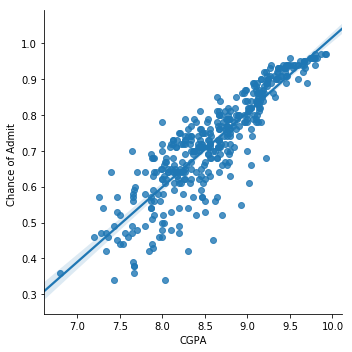

In [230]:
sns.lmplot(x = 'CGPA', y = 'Chance of Admit ', data = admission_df)

The above is the scatter plot with regression line of CGPA with respect to the whole dataset